In [1]:
import json
import os
import pandas as pd

In [2]:
path_dir_val = "D:\\Ddrive\\3rd\\git\\test\\failed_list_val.csv"
list = pd.read_csv(path_dir_val)
len(list), list.head()


(514,
                              0
 0  0895_1978_04_00000044_F.jpg
 1  0895_1978_04_00000045_F.jpg
 2  0899_1985_02_00000038_F.jpg
 3  0899_1985_07_00000048_F.jpg
 4  0899_1985_08_00000049_F.jpg)

In [3]:
age = []
for i in range(len(list)):
    age.append(list.iloc[i].values[0].split('_')[2])
len(age)

514

In [4]:
age = pd.DataFrame(age)

# 데이터프레임에서 값의 빈도수 계산
val_counts = age.value_counts()
val_counts = val_counts.reset_index()
val_counts.columns = ['age', 'count']
val_counts = val_counts.sort_values('age')
val_counts['age'] = val_counts['age'].astype('int')

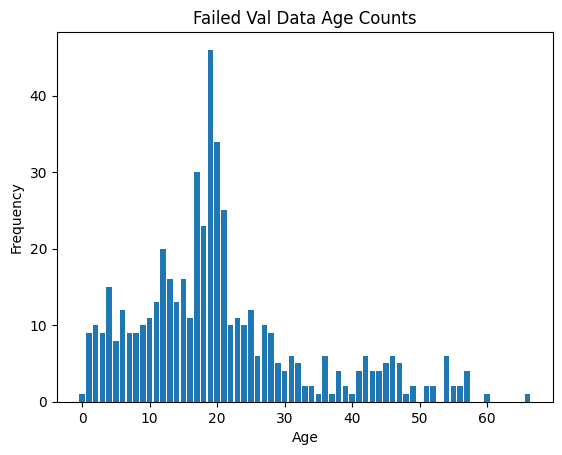

In [10]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.bar(val_counts['age'], val_counts['count'])

# 그래프 제목 및 축 레이블 설정
plt.title('Failed Val Data Age Counts')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [6]:
path_dir = "D:\\Ddrive\\3rd\\git\\test\\failed_list_train.csv"
list = pd.read_csv(path_dir)
len(list), list.head()

(3227,
                              0
 0  0001_1992_01_00000001_F.jpg
 1  0002_1997_05_00000017_F.jpg
 2  0002_1997_05_00000019_F.jpg
 3  0002_1997_15_00000032_F.jpg
 4  0003_1988_10_00000018_F.jpg)

In [7]:
age_tr = []
for i in range(len(list)):
    age_tr.append(list.iloc[i].values[0].split('_')[2])
age_tr = pd.DataFrame(age_tr)

# 데이터프레임에서 값의 빈도수 계산
tr_counts = age_tr.value_counts()
tr_counts = tr_counts.reset_index()
tr_counts.columns = ['age', 'count']
tr_counts = tr_counts.sort_values('age')
tr_counts['age'] = tr_counts['age'].astype('int')


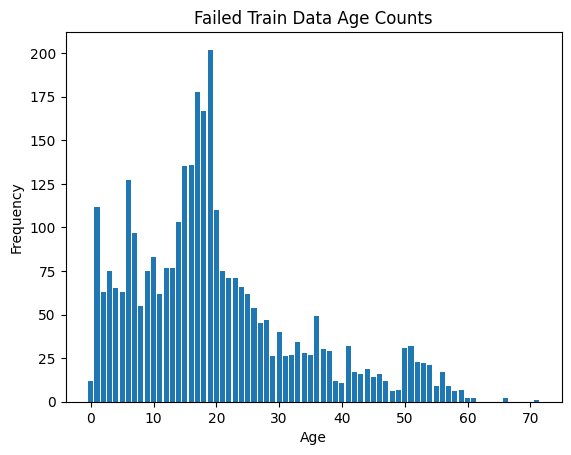

In [11]:
# 막대 그래프 그리기
plt.bar(tr_counts['age'], tr_counts['count'])

# 그래프 제목 및 축 레이블 설정
plt.title('Failed Train Data Age Counts')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

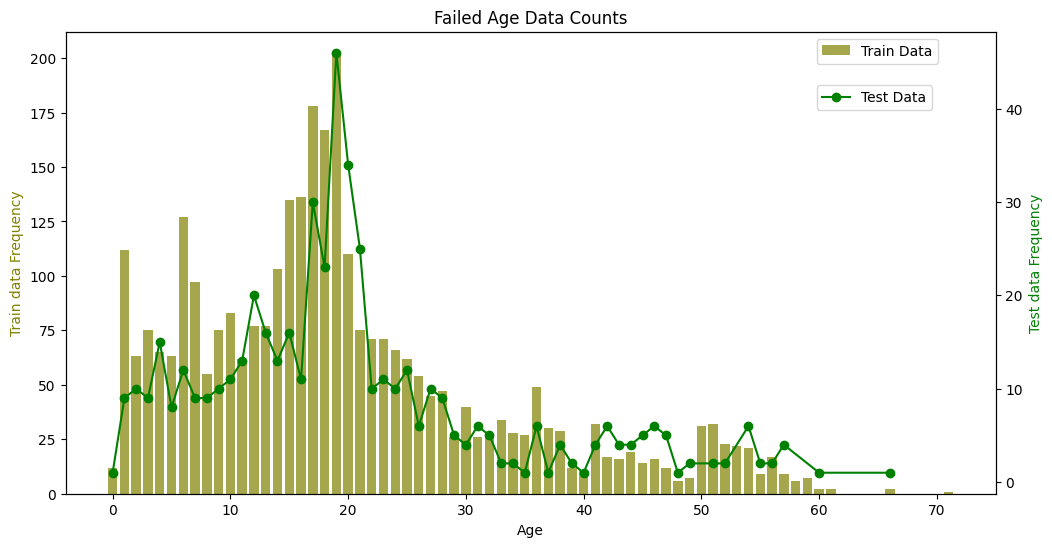

In [12]:
fig, ax1 = plt.subplots(figsize=(12,6))

# 막대 그래프 (첫 번째 축)
ax1.bar(tr_counts['age'], tr_counts['count'], color='olive', alpha=0.7, label='Train Data')
ax1.set_xlabel('Age')
ax1.set_ylabel('Train data Frequency', color='olive')

plt.title('Failed Age Data Counts')

# 두 번째 축 생성 (이중 축)
ax2 = ax1.twinx()
ax2.plot(val_counts['age'], val_counts['count'], color='g', marker='o', linestyle='-', label='Test Data')
ax2.set_ylabel('Test data Frequency', color='g')

ax1.legend(loc='upper left', bbox_to_anchor=(0.8, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9))
plt.show()

In [14]:
# 라벨 데이터 나이값 출력
def label_data(path_dir):
    file_list = os.listdir(path_dir)
    label = []
    for filename in file_list:
        # 파일 경로
        path = os.path.join(path_dir+'/'+filename)

        # json 파일 추출
        with open(path, 'r') as label_file:
            label_data = json.load(label_file)
        
        # list
        label.append(label_data['age_past'])
    return label

In [17]:
lbl_train_output_dir = "D:\\Ddrive\\3rd\\data_ex\\training\\labels"
lbl_val_output_dir = "D:\\Ddrive\\3rd\\data_ex\\validation\\labels"

train_labels = label_data(lbl_train_output_dir)
val_labels = label_data(lbl_val_output_dir)
tr = pd.DataFrame(train_labels)
val = pd.DataFrame(val_labels)

tr.columns = ['age']
val.columns = ['age']

# 빈도수 계산
tr_value_counts = tr.age.value_counts()
val_value_counts = val.age.value_counts()

In [22]:
tr_counts_all = tr_value_counts.sort_index()
val_counts_all = val_value_counts.sort_index()

In [30]:
tr_counts_all = tr_counts_all.reset_index()
val_counts_all = val_counts_all.reset_index()

In [32]:
len(tr_counts_all), len(val_counts_all)

(83, 76)

In [33]:
len(tr_counts), len(val_counts)

(64, 58)

In [69]:
tr = pd.merge(tr_counts_all, tr_counts, how='left', on='age').fillna(int(0))
tr.columns = ['age', 'all', 'no_detect']

In [70]:
val0 = pd.merge(tr_counts_all, val_counts_all, how='left', on='age').fillna(int(0))
val = pd.merge(val0, val_counts, how='left', on='age').fillna(int(0))
val.columns = ['age', 'whole', 'all', 'no_detect']
val = val[['age', 'all', 'no_detect']]

In [75]:
tr = tr.sort_index()
val = val.sort_index()

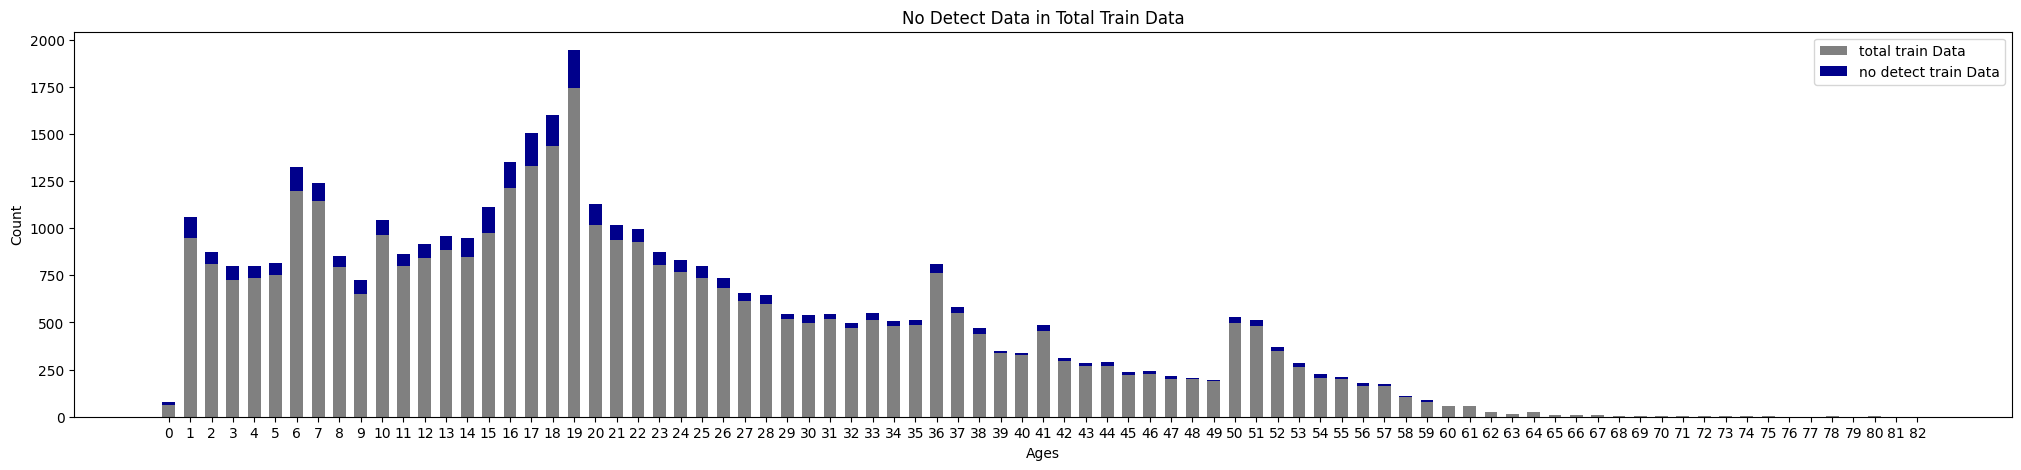

In [93]:
# 그래프 그리기
width = 0.6  
fig, ax = plt.subplots(figsize=(25,5))
bar1 = ax.bar(tr['age'], tr['all'], width, label='total train Data', color = 'gray')
bar2 = ax.bar(tr['age'], tr['no_detect'], width, label='no detect train Data', bottom=tr['all'] - tr['no_detect'], color = 'darkblue')

plt.title('No Detect Data in Total Train Data')
plt.xlabel('Ages')
plt.ylabel('Count')

ax.set_xticks(tr['age'])
ax.set_xticklabels(tr['age'])

plt.legend()
plt.show()


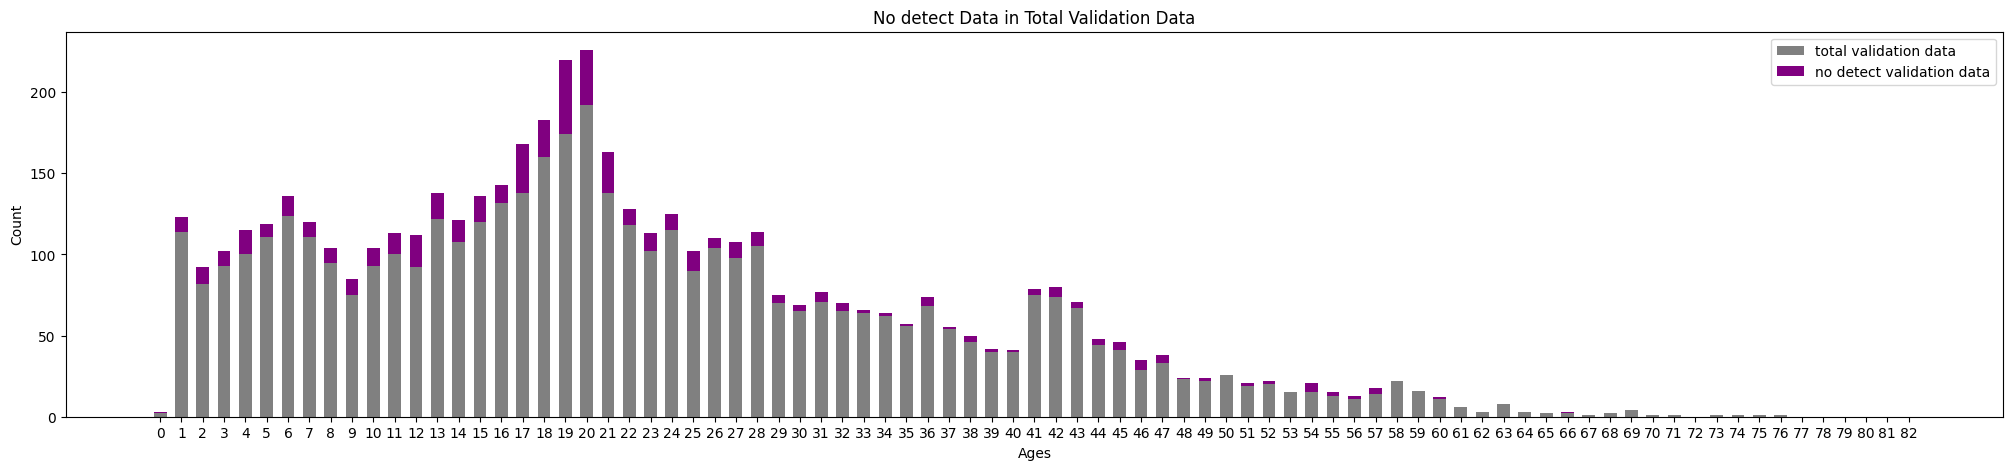

In [94]:
# 그래프 그리기
width = 0.6  
fig, ax = plt.subplots(figsize=(25,5))
bar1 = ax.bar(val['age'], val['all'], width, label='total validation data', color='gray')
bar2 = ax.bar(val['age'], val['no_detect'], width, label='no detect validation data', bottom=val['all'] - val['no_detect'], color='purple')

plt.title('No detect Data in Total Validation Data')
plt.xlabel('Ages')
plt.ylabel('Count')

ax.set_xticks(val['age'])
ax.set_xticklabels(val['age'])

plt.legend()
plt.show()
